# Understanding, Repairing and Preparing Data
## Data from Many sources into a Data Lake
A Data Model and all predictions based on the model is only as good as the undelying data that the model is built on. In real life, data is collected from many disparate sources with no apparent links to each other. Data is stored in a data repository with the assumption and hope that someday we will find or discover linkages between disparate pieces of data leading to information that we were not previously aware of. This gave rise to the data repositories called "Data Lakes" where incoming data is stored without prior knowledge of any/all linkages and relevance of all parts of stored data.

## Quality of Stored Data
Not all data is created in a "structured" form with well defined data schema. Also, often there are gaps in the data with incomplete and semi-complete information which were never filled at the source.

However almost all data models and Prediction Algorithms do NOT deal with incomplete data. Predictions based on these incomplete data are ivariably incomplete and inaccurate as the quality of the "Training Data Set" determines the level of precise learning by the model and often lead to incorrect prediction when used on "real life" data which are not part of initial data sets from which the Training and Test data sets were created.

Measures such as Accuracy, K-Fold Cross Validation, Precision, Recall are used by all data modelers to improve the prediction quality, but the root of the difficulties in improving these measures usually lie incomplete and inaccurate data.

Good quality data, as expected, usually leads to good quality and releiable predictions.

## Not So Galamorous Part of Data Science
Though the job of a Data Scientist, these days, was described in a HBR article as the "sexiest job in today's industry" the data scientists do not spend all their day looking into their crystall ball and accurately predict future. A very large part of their day is spent on understanding the data, received from an unknown source, assessing its quality and finally repairing and filling the missing data with data that is sensible and meaningful in the context of the data model and Predictive Analytics technique and algorithm that the data scientist plans to employ.

Time and effort spent on the "not so glamarous" activities of massaging and repairing the data pays off, leading to improved accuracy, K-Fold Cross Validation Score, Precision, Recall of the learning and prediction of the model and makes the final "glamarous" part of the job easier.

## Data Repair and Preparation, More Art than Science
Every data is different and so are the contexts in which the data is expected to be used. Other than a few obvious steps of filling the gaps in data with some meaningful value (especially for numeric data), translating categorical data (Male, Female, Yes, No, High, Medium, Low etc.) to corresponding numeric values (as most of the data analysis methods require numeric data to produce reasonably meaningful predictions), what data to fill the data-gaps with is very context dependent and depends on the skill, knowledge and "intuition" of the data scientist on the application space in which the models and predictions are employed.

Since it is not easy to to provide a "cut and dried" methodology of data repair and data preparation, we will step through a specific example of a data set, perform some data repair and finally build some well used predictive analytics models on the data and measure their performance.

## Brief Context of the Data and What We Will Do
The data set we are going to use is the data on Loan Application of 614 Applicants, their Background Information and the Status of their loan. We will go through the steps of exploring the data, filling gaps where needed with relevant data and then apply some "Classification" preditive algorithms (Decision Tree, Random Forest, Logistic Regression etc.) and measure their performance and will attempt to improve their prediction performance.

## Libraries and Data Structures that We Will Use
The primary data structure that we will use is **Data Frame** from Pandas library.

The libraries that we will primarily use are
* **Pandas**
* **numpy**
* **scipy**
* **matplotlib** and finally
* **scikitlearn** for modeling and prediction

The raw data to repair, create and train the model containing 614 records in CSV format is stored in              

                      "c:/users/utpal.datta/desktop/train_data.csv". 

The corresponding test data set is stored in

                      "c:/users/utpal.datta/desktop/test_data.csv".


Let's import some of the necessary libraries (we will import other libraries later as needed) and read the data into a Data Frame. 

We will also set the environment of our notebook so that multiple python command can be executed from the same code cell, producing results in the same sequence as the execution of the code.

## Exploring the Raw Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read in the train data
df = pd.read_csv("c:/users/utpal/desktop/otherdata/train_data.csv")


Let's look at the first 20 and last 10 records of the data

In [7]:
df.head(20)
df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Let's get an Overall Summary of the data and draw some obvious but useful conclusions.

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Here are a few inferences, we can draw by looking at the output of **describe()** function:

* **LoanAmount** has (614 – 592) **22** missing values.
* **Loan_Amount_Term** has (614 – 600) **14** missing values.
* **Credit_History** has (614 – 564) **50** missing values.
* We also notice that about 84% applicants have a credit_history. We derive this conclusion as the **Mean** of **Credit_History** field is **0.84** and remembering, **Credit_History** has value 1 for those who have a credit history and 0 otherwise)
* The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome (we will check this out later).



For Non-numeric (primarily **Categorical data**) such as **Property Area**, **Credit History**, **Education** we can look at the  actual value for each record, but it is more meaningful or exciting.

In [9]:
df["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

It is lot more meaningful to look at the **Counts** of each category as that give a better idea of the distribution of the applicant poplation on these attributes. For these fields we will mainly stay with the **Category Counts** rather than the actual data. 

Remember, all **Categorical** data is not necessarily **non-numeric**, such as **Loan_Amount_Term**, but they can still be categorized into a relatively small number of categories.

In [10]:
df["Property_Area"].value_counts()
df["Credit_History"].value_counts()
df["Education"]. value_counts()
df["Gender"].value_counts()
df["Married"].value_counts()
df["Dependents"].value_counts()
df["Self_Employed"].value_counts()
df["Loan_Amount_Term"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Next, we will get the distribution of few of the attibutes and see if they are reasonably close to a **Normal Distribution** as in all our subsequent modeling and predictions we will assume the data to be **Normally Distibuted**.

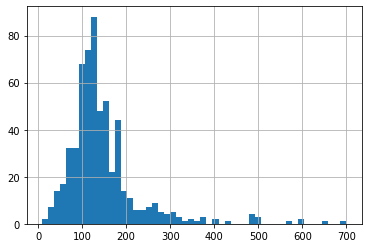

In [11]:
df["LoanAmount"].hist(bins=50)

THe **Loan Amount** data looks to be reasonably normally distributed with a few **outliers**. Outliers can some time distrort the predictions (e.g. in fitting a **Best-fit Prediction Line** in a **Linear Regression** analysis) and may have to be removed.

Let's see the distribution of **ApplicantIncome** and **CoapplicantIncome**

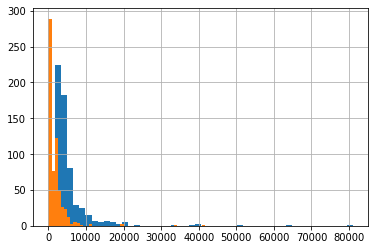

In [12]:
df["ApplicantIncome"].hist(bins=50)
df["CoapplicantIncome"].hist(bins =50)

They both look quite skewed with quite a few outliers.

We will add the two attributes to a new attribute called **Total Income** and will also use the **logarithmic** values of the **Total Income** as taking **Logarithmic** values are quite often used to smmothen the skewness of the data (***please check your statistics book to find out why***)

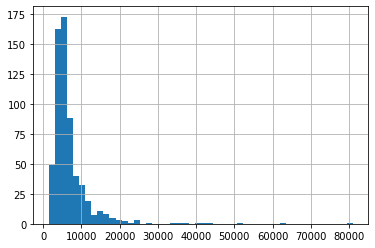

In [13]:
df["TotalIncome"] = df.ApplicantIncome + df.CoapplicantIncome
df["TotalIncome"].hist(bins=50)

As expected, the **Total Income** is still skewed. So we will take the log of Total Income and see its distribution.

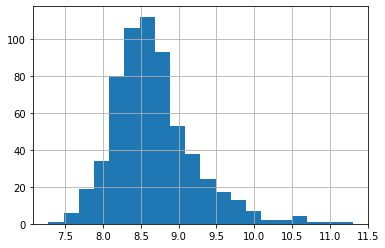

In [14]:
df["TotalIncome_log"] = np.log(df["TotalIncome"])
df["TotalIncome_log"].hist(bins=20)

That looks much closer to a **Normal Distribution**.

We can also use **Boxplot** on some of these data. **Boxplot** of data is quite extensively used in many **Descriptive Data Analysis**. We can see them often in **Stock Market** data analysis.

Simply defined, The **Box Plot (a.k.a. Box and Whisker diagram)** is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. A good description of **Boxplot of data** can be found at http://www.physics.csbsju.edu/stats/box2.html

So let's do a few few **Boxplot** of our data

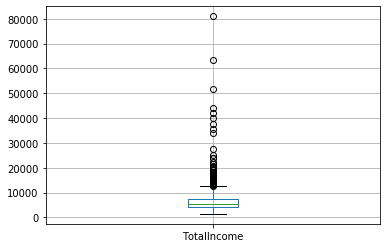

In [15]:
df.boxplot(column='TotalIncome')

This showss the presence of a lot of outliers/extreme values (confirms the **Histogram** above). This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

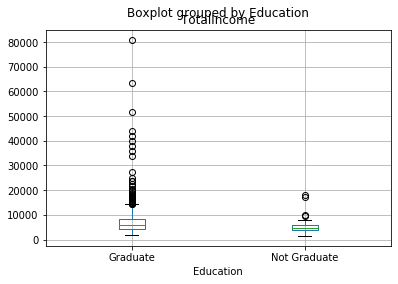

In [16]:
df.boxplot(column='TotalIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

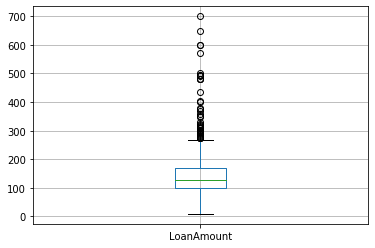

In [17]:
df.boxplot(column='LoanAmount')

There are are some extreme values in Loan Amount. 

Clearly, both ApplicantIncome (TotalIncome) and LoanAmount require some amount of data massaging/manipulation. LoanAmount has some missing values as well as some extreme values, while ApplicantIncome has a few extreme values. We will take this up a bit later.

## Taking a Closer Look at Some Categorical Attributes
We have already seen (above) the distribution of **Credit History** (***0 = NO, 1 = YES***).

We can plot a bar graph for Credit_History data distribution. 

The **Mean** of the 0-values (means NO) and the 1-values (means YES) in Loan_Status can be seen as the probability of getting the loan and that of not getting it.

We can create this data from the raw data using a **pivot table** function and plot them as we did for Credit_History

===== Apllicant by Credit History =======


0.0     89
1.0    475
Name: Credit_History, dtype: int64

Text(0.5, 0, 'Credit History')

Text(0, 0.5, 'Count of Applicants')

Text(0.5, 1.0, 'Applicants by Credit History')

======= Probability of Getting Loan by Credit History ======


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 0, 'Credit History')

Text(0, 0.5, 'Probability of getting loan')

Text(0.5, 1.0, 'Probability of getting loan by Credit History')

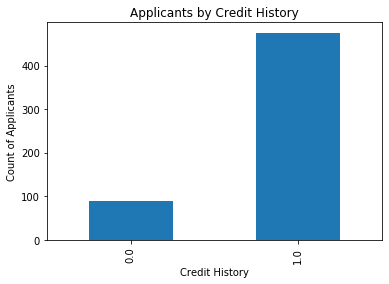

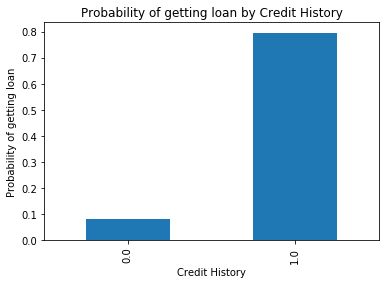

In [18]:
temp1 = df["Credit_History"].value_counts(ascending=True)
print('===== Apllicant by Credit History =======')
temp1
b= temp1.plot(kind='bar')
b.set_xlabel('Credit History')
b.set_ylabel('Count of Applicants')
b.set_title('Applicants by Credit History')

temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('======= Probability of Getting Loan by Credit History ======')
temp2
a = temp2.plot(kind='bar', legend=False)
a.set_xlabel('Credit History')
a.set_ylabel('Probability of getting loan')
a.set_title('Probability of getting loan by Credit History')

These two plots can also be visualized by combining them in a stacked chart using **Pandas Crosstab** function and also adding a Legend:

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


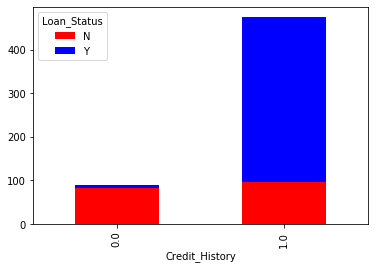

In [19]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

We can also Cross Tablulate Credit_History with Gender and then Cross Tabulate that to Loan_Status

======= Loan Status by Credit History and Gender ===========


Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

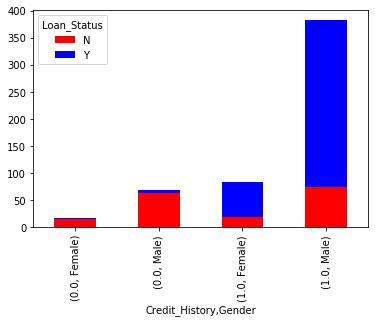

In [20]:
temp4 = pd.crosstab([df.Credit_History, df['Gender']], df.Loan_Status)
print('======= Loan Status by Credit History and Gender ===========')
temp4
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

***We can analyse the data from many more angles using Pandas Pivot Table and Crosstab capabilities***

For example, we can take a look at the **Median** balue of Loan Amount cross tablulated acoross the categical values of **Education**(Graduate, Not-Graduate) and **Employment** (Self Employed, Not Self Employed)

In [21]:
t5 = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
t5

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


## Massaging and Repairing the Data Using Pandas


We have seen, so far, that
* The data contains missing values in some variables. We will fill these missing values with appropriate, estimated values. But these estimates need to be done wisely depending on the amount of missing values and the expected importance of variables.
* While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

Let's start by checking which attributes (columns) in the data has **Null** value (which is not convenienet for most numeric calculations) and **how many** values are **Null**

In [22]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

***Our goal will be to have a data set where None of the rows have Null in any of its columns, and all the columns of all the rows are filled with "reasonably" estimated values.***

Let's take some easy ones.

If **Married** column has **Null** values, it is probably safe to set it as zero. We can double check by checking the **Dependents** column for the rows where **Married** is **Null**, which expect to be **Null**. The **CoapplicantIncome** probably would be **Zero**, but that may not be necessarily true

In [23]:
df[df['Married'].isnull()].loc[:, ['Married','Dependents', 'CoapplicantIncome']]

,Married,Dependents,CoapplicantIncome
104,NaN,NaN,754.0
228,NaN,NaN,0.0
435,NaN,NaN,0.0


So it would be safe to fill all the **Null** values in **Married** column by No. We can do that as follows

In [24]:
df['Married'].fillna('No',inplace=True)

Let's check if it worked. We would expect the **isnull()** count for **Married** column to go down to 0 (zero).

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

So, we are now OK with the **Married** column.

If the **Dependents** column is **Null**, it is probably safe to set it as 0 (zero). So let's do that and check again for the **isnull()** count.

In [26]:
df['Dependents'].fillna(0,inplace=True)

In [27]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

Next we will check what percentage of the applicants are NOT Self Employed.

In [28]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

The percentage of "Not Self Employed" is about 13% (82 out of 582 or 82 out of 614). So it would be safe to set all the **Null** values in the **Self_Employed** column to **No**

In [29]:
df['Self_Employed'].fillna('No', inplace=True)

In [30]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [31]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Since more than 80% of the applicants are **Male**, we will set all the **Null** values in the **Gender** column to **Male** (sort of arbitrarily)

In [32]:
df['Gender'].fillna('Male', inplace=True)

In [33]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [34]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Since a rather small (about 15%) percentage of the applicant do not have Credit History, and Credit History has a strong correlation with the Loan_Status (approval or disapproval), it would be safe to set the missing values in the Credit_History column to No

In [35]:
df['Credit_History'].fillna('No', inplace=True)

Filling the missing values in the LoanAmount column is somewhat more involved. We will do that in the following steps.

Two factors (Applicant attributes) that seem to influence the LoanAmount are
* Whether the applicant has a Credit History or they do not
* The applicant's Education, i.e. whether the applicant is Graduate or Not-Graduate

The LoanAmount in the raw data seem to vary quite a bit based on these two criteria.

**Step - 1:** As the first step we will classify the applicants based on these two criteria. The classes of applicants are
* Graduate with Credit History
* Graduate with No Credit History
* Not Graduate with Credit History
* Not Graduate with No Credit History

**Step - 2:** We will find the **Median** value of the **LoanAmount** for the applicants in these four categories

We will perform Steps 1 and 2 using Pivot table as follows

In [36]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)

The output of this categorization is shown below.

In [37]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


**Step - 3:** Among the 22 rows with missing values in the LoanAmount column
* We will find the records where the applicant is Graduate and has Credit History and will set their LoanAmount value to the **Median** value of that category, i.e. **157.5**
* We will find the records where the applicant is Graduate and has No Credit History and will set their LoanAmount value to the **Median** value of that category, i.e. **130.0**
* We will find the records where the applicant is Not Graduate and has Credit History and will set their LoanAmount value to the **Median** value of that category, i.e. **130.0**
* We will find the records where the applicant is Not Graduate and has No Credit History and will set their LoanAmount value to the **Median** value of that category, i.e. **113.0**

These are done as follows

In [38]:
df.loc[((df['LoanAmount'].isnull()) & 
   (df['Education'] == 'Graduate') & 
   (df['Self_Employed'] == 'Yes')),'LoanAmount'] = table.loc['Yes','Graduate']
df.loc[((df['LoanAmount'].isnull()) & 
   (df['Education'] == 'Graduate') & 
   (df['Self_Employed'] == 'No')),'LoanAmount'] = table.loc['No','Graduate']
df.loc[((df['LoanAmount'].isnull()) & 
   (df['Education'] == 'Not Graduate') & 
   (df['Self_Employed'] == 'Yes')),'LoanAmount'] = table.loc['Yes','Not Graduate']
df.loc[((df['LoanAmount'].isnull()) & 
   (df['Education'] == 'Not Graduate') & 
   (df['Self_Employed'] == 'No')),'LoanAmount'] = table.loc['No','Not Graduate']

Now the LoanAmount column has no missing value.

In [39]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
TotalIncome           0
TotalIncome_log       0
dtype: int64

At this point the only column with missing value is Loan_Amount_Term. Let us see the distribution of values in this field

In [40]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
df['Loan_Amount_Term'].median()

360.0

360 is the Median value of this field. Also 83% of the applicant has 360 as their Loan_Amount_Term. So we will set the missing values in this field to the Median value (360)

In [42]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [43]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
dtype: int64

Now all the missing values in the data set have been filled with **reasonable estimates** of the respective fields and the data set is now ready for some **Predictive Analysis**